# Capstone Project: Optimising Sales Strategies in a Warehouse and Retail Operations Using Data-Driven Insights.

- Introduction

This capstone project aims to analyse the "Warehouse and Retail Sales" dataset available on Data.gov to uncover trends, patterns, and opportunities for enhancing sales performance in warehouse and retail operations. The significance of this study lies in addressing a real-world business challenge: optimising sales strategies to improve profitability and operational efficiency. As e-commerce continues to grow and consumer behaviour evolves, retail and warehouse operations must adapt to remain competitive. This project seeks to provide actionable insights and data-driven solutions to support businesses in maximising their sales potential.

The project is both relevant and engaging as it integrates data analysis, business strategy, and real-world application. By examining key factors influencing sales—such as inventory management, pricing strategies, and seasonal trends—this study will offer valuable insights for businesses. The findings can contribute to informed decision-making, ultimately leading to increased revenue and improved customer satisfaction.


# ------------------------------------ DATASET ANALYSIS ---------------------------------------------

In [1]:
# import libraries:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# taking consideration of all types of missing values: 

mvf = ['no','n.a.', 'NA', 'na', 'n/a', 'n\a', '?', '--', 'nan', 'none', 'NAN','NaN', ' nan', '-']

In [3]:
# Load the dataset:

df = pd.read_csv('warehouse_and_retail_sales.csv' , na_values= mvf)

In [4]:
# Display the first 10 rows:

df.head(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,7,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1174.0,1041.0,18317.01
1,2019,7,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1198.0,1416.0,17810.87
2,2019,5,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1373.0,1207.0,17703.62
3,2017,11,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,992.0,981.0,16079.12
4,2017,6,CROWN IMPORTS,96750,CORONA EXTRA 2/12 NR - 12OZ,BEER,53.0,61.0,15955.46
5,2017,8,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,990.0,1077.0,15346.71
6,2019,8,CROWN IMPORTS,96750,CORONA EXTRA 2/12 NR - 12OZ,BEER,764.3,771.0,15289.01
7,2019,6,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1494.0,1462.0,14739.92
8,2019,9,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,972.0,965.0,14511.01
9,2017,7,CROWN IMPORTS,96750,CORONA EXTRA 2/12 NR - 12OZ,BEER,75.0,76.0,14411.51


In [5]:
# Display the last 10 rows:

df.tail(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
160360,2017,9,ANHEUSER BUSCH INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4210.0
160361,2019,4,PREMIUM DISTRIBUTORS INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4299.0
160362,2018,1,ANHEUSER BUSCH INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4302.0
160363,2017,11,ANHEUSER BUSCH INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4312.0
160364,2019,7,PREMIUM DISTRIBUTORS INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4349.0
160365,2017,7,ANHEUSER BUSCH INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4364.0
160366,2019,10,PREMIUM DISTRIBUTORS INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4365.0
160367,2017,8,ANHEUSER BUSCH INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4536.0
160368,2017,6,ANHEUSER BUSCH INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4804.0
160369,2017,10,ANHEUSER BUSCH INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0.0,0.0,-4996.0


The dataset contains warehouse and retail sales records from multiple years, detailing suppliers, item descriptions and sales figures. The initial entries show "Empty 1/2 Keg" under the item type "Dunnage," with negative warehouse sales values, likely representing keg returns or inventory adjustments.The dataset appears to capture both product sales and logistical activities, such as returns and stock transfers. Given this mix of transactional data, thorough data cleaning and careful interpretation are essential to differentiate between various entry types when analysing sales trends and performance.

In [6]:
# Check basic information about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160370 entries, 0 to 160369
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              160370 non-null  int64  
 1   MONTH             160370 non-null  int64  
 2   SUPPLIER          160238 non-null  object 
 3   ITEM CODE         160370 non-null  object 
 4   ITEM DESCRIPTION  160370 non-null  object 
 5   ITEM TYPE         160370 non-null  object 
 6   RETAIL SALES      160367 non-null  float64
 7   RETAIL TRANSFERS  160370 non-null  float64
 8   WAREHOUSE SALES   160370 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 11.0+ MB


The dataset consists of 307644 entries and 9 columns related to warehouse and retail sales transactions, including key details such as year, month, supplier, item code, item description, item type, retail sales, retail transfers and warehouse sales. Most columns are completed, although some have a few missing values, particularly in the supplier and item type categories.

# Data Cleaning and Pre-processing

-Before continuing the analysis, it is essential to clean and properly format the dataset:

In [7]:
# Check for missing values:

df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            132
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             0
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

The df.isnull().sum() output shows that there are 166 missing values in the "SUPPLIER" column, 1 in "ITEM TYPE," and 3 in "RETAIL SALES," while all other columns are complete.

In [8]:
# Check for duplicates:

df.duplicated().sum()

0

the output of df.duplicated().sum() shows that there are no duplicate entries in the dataset, indicating data uniqueness across all records.

                                   # Handling missing values:

- Missing values in the 'SUPPLIER' column will be filled with 'Unknown' to maintain the total number of entries while ensuring valuable transaction data is not lost.

In [9]:
df['SUPPLIER'].fillna("UNKNOWN", inplace=True)

- The missing values in 'RETAIL SALES' will be filled with the median to prevent any skewing of the data.

In [10]:
retail_sales_median = df['RETAIL SALES'].median()
df['RETAIL SALES'].fillna(retail_sales_median, inplace=True)

- The missing values in the "ITEM TYPE" column will be removed, as the number of missing entries is minimal compared to the overall size of the dataset and deleting them will not significantly impact the analysis:

In [11]:
df.dropna(subset=['ITEM TYPE'], inplace=True)

                                   # Validate Data Types:
                                   
To ensure that the data types of each column are appropriate for analysis.

- date should be in datetime format (add new column).

- YEAR and MONTH should be integers.

- RETAIL SALES, RETAIL TRANSFERS, and WAREHOUSE SALES should be numeric (float or int).

- SUPPLIER, ITEM CODE, ITEM DESCRIPTION and ITEM TYPE should be categorical (object/string).


In [12]:
# Convert date columns to datetime format and add a new date column:

df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

In [13]:
# Rename coloumns's Head for easier processing.

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [14]:
# Standardise categorical columns for easier processing:

df['supplier'] = df['supplier'].str.strip().str.lower()
df['item_description'] = df['item_description'].str.strip().str.lower()
df['item_type'] = df['item_type'].str.strip().str.lower()

In [15]:
# Check dataset is now cleaned, pre-processed and ready for the next step of the analysis:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160370 entries, 0 to 160369
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   year              160370 non-null  int64         
 1   month             160370 non-null  int64         
 2   supplier          160370 non-null  object        
 3   item_code         160370 non-null  object        
 4   item_description  160370 non-null  object        
 5   item_type         160370 non-null  object        
 6   retail_sales      160370 non-null  float64       
 7   retail_transfers  160370 non-null  float64       
 8   warehouse_sales   160370 non-null  float64       
 9   date              160370 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 12.2+ MB


In [16]:
df

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date
0,2020,7,crown imports,23445,corona extra loose nr - 12oz,beer,1174.0,1041.0,18317.01,2020-07-01
1,2019,7,crown imports,23445,corona extra loose nr - 12oz,beer,1198.0,1416.0,17810.87,2019-07-01
2,2019,5,crown imports,23445,corona extra loose nr - 12oz,beer,1373.0,1207.0,17703.62,2019-05-01
3,2017,11,crown imports,23445,corona extra loose nr - 12oz,beer,992.0,981.0,16079.12,2017-11-01
4,2017,6,crown imports,96750,corona extra 2/12 nr - 12oz,beer,53.0,61.0,15955.46,2017-06-01
...,...,...,...,...,...,...,...,...,...,...
160365,2017,7,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,-4364.00,2017-07-01
160366,2019,10,premium distributors inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,-4365.00,2019-10-01
160367,2017,8,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,-4536.00,2017-08-01
160368,2017,6,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,-4804.00,2017-06-01


# Exploratory Data Analysis (EDA)

Now that the dataset has been cleaned and preprocessed, the next step is to conduct Exploratory Data Analysis (EDA) to uncover patterns, trends and insights.

In [17]:
# Check the number of rows and columns.

df.shape

(160370, 10)

In [18]:
# Verify the columns in the dataset.

df.columns

Index(['year', 'month', 'supplier', 'item_code', 'item_description',
       'item_type', 'retail_sales', 'retail_transfers', 'warehouse_sales',
       'date'],
      dtype='object')

In [19]:
# Summary Statistics to get an overview of the dataset.

df.describe()

,year,month,retail_sales,retail_transfers,warehouse_sales,date
count,160370.000000,160370.000000,160370.000000,160370.000000,160370.000000,160370
mean,2018.453196,6.455366,13.205613,13.152975,47.902485,2018-11-27 17:58:54.002618880
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000,2017-06-01 00:00:00
25%,2017.000000,3.000000,0.000000,0.000000,1.000000,2017-11-01 00:00:00
50%,2019.000000,7.000000,2.970000,3.000000,5.000000,2019-03-01 00:00:00
75%,2019.000000,9.000000,10.820000,11.000000,14.000000,2019-09-01 00:00:00
max,2020.000000,12.000000,2739.000000,1990.830000,18317.010000,2020-09-01 00:00:00
std,1.088078,3.467819,41.974621,40.902416,344.048740,NaN



Year and Month: The dataset spans from 2017 to 2020, with an average year of approximately 2018 and a median month of June. This suggests that the entries are predominantly concentrated in the more recent years, particularly around 2018 and 2019.

Retail Sales: The average retail sales amount to about 7.02, demonstrating considerable variability as evidenced by a maximum value of 2739 and a minimum of -6.49, indicating the presence of negative values that may require further scrutiny, possibly due to returns or adjustments. The standard deviation of approximately 30.99 reflects substantial dispersion in sales figures across transactions.

Retail Transfers: The average for retail transfers is approximately 6.94, with values fluctuating between -38.49 and a maximum of 1990.83. The occurrence of negative transfers suggests the possibility of returns or adjustments, and the high standard deviation further highlights the variability in transfer amounts.

Warehouse Sales: The average warehouse sales stand at 25.32, with a minimum recorded at -4996 and a maximum of 18317, indicating marked variability and the potential for outliers that could influence analysis. The standard deviation of about 249.52 underscores the degree of variation in warehouse sales across the dataset.

In [20]:
df.describe(include="object")

,supplier,item_code,item_description,item_type
count,160370,160370,160370,160370
unique,335,18930,19601,8
top,e & j gallo winery,23445,woodford reserve ky strait - 1.75l,wine
freq,9718,24,29,86542


Supplier: There are 397 unique suppliers within the dataset, indicating a diverse range of sources. The most frequent supplier, "republic national distributing co," accounts for 20,994 entries, suggesting that this supplier significantly contributes to the dataset, which may warrant further examination for insights about its dominance.

Item Code: The dataset includes 49,771 unique item codes, reflecting a wide variety of products offered. The most common item code, '175,' appears 24 times, indicating that while many items are available, a small subset is particularly popular.

Item Description: With 34,819 unique item descriptions, there is a rich diversity in product offerings, though the most frequently occurring item description, "burgans albarino - 750ml," appears only 44 times. This relatively low frequency suggests that although many items are listed, they may cater to specific tastes or preferences.

Item Type: The dataset categorises products into 8 distinct item types. The most prevalent type is "wine," which makes up a substantial portion of the entries (187,640), indicating a clear emphasis on this category within the overall dataset.

Overall, these statistics highlight the diversity in the dataset regarding suppliers, products, and their classifications, as well as the prevalence of certain items and categories. Such insights can inform further analysis, particularly regarding supplier relationships, product popularity, and market trends.




In [21]:
# Unique values present in the 'month' column

df['month'].unique()

array([ 7,  5, 11,  6,  8,  9,  1, 10,  2, 12,  3,  4], dtype=int64)

The .unique() output shows that all months are well-represented in the dataset, confirming that it includes transactions from every month.

In [22]:
# How many transactions occurred in each month:

df['month'].value_counts()

month
1     19514
9     19418
7     19343
11    14541
10    13844
6     13481
8     13282
2     12845
3     12796
12     8000
5      6735
4      6571
Name: count, dtype: int64

January and September have the highest transaction counts, while April and May have the lowest. This variation could suggest seasonal trends in sales or transfers, reflecting increased activity during specific months, which may require further analysis to understand the underlying causes, such as promotional events, holiday seasons, or other market dynamics that influence consumer behaviour.

In [23]:
df['item_description'].unique()

array(['corona extra loose nr - 12oz', 'corona extra 2/12 nr - 12oz',
       'heineken loose nr - 12oz', ..., 'empty 1/4 keg (30.00)',
       'empty 1/6 keg (30.00)', 'empty 1/2 keg (30.00)'], dtype=object)

In [24]:
df['item_description'].nunique()

19601

From the output above, the presence of entries like 'empty kegs' and 'beer credit' indicates that the dataset may also track returns or credits associated with keg transactions, in addition to regular sales.

In [25]:
df['supplier'].unique()

array(['crown imports', 'heineken usa', 'miller brewing company',
       'anheuser busch inc', 'mark anthony brands inc',
       'boston beer corporation', 'diageo north america inc',
       'yuengling brewery', 'flying dog brewery lllp', 'pabst brewing co',
       'dogfish head craft brewery llc', 'dogfish head craft brewery',
       'sierra nevada brewing co', 'sutter home winery inc',
       'new belgium brewing inc', 'legends ltd',
       'republic national distributing co',
       'jackson family enterprises inc', 'constellation brands',
       'clipper city brewing co', 'e & j gallo winery',
       'fifth generation inc', 'troegs brewing company',
       'nexterra wine company', 'buck distributing company inc',
       'constantine wines inc', 'dc brau brewing llc',
       'victory brewing company llc', 'bacardi usa inc',
       'labatt usa operating co llc', 'unknown',
       'delmar brewing company llc', 'katcef brothers inc',
       'quintessential llc', 'the wine group',
     

In [26]:
df['supplier'].nunique()

335

In [27]:
df['item_type'].unique()

array(['beer', 'wine', 'kegs', 'liquor', 'ref', 'non-alcohol',
       'str_supplies', 'dunnage'], dtype=object)

This categorisation indicates that the dataset encompasses a broad spectrum of products, primarily focusing on alcoholic beverages such as beer, wine, and liquor, while also incorporating non-alcoholic items and supplementary supplies. The inclusion of 'dunnage' suggests that the dataset also tracks packaging materials, which may be essential for logistics and inventory management.

Additionally, the presence of 'kegs' indicates a specific focus on bulk beverage sales. The variety in item types points to a comprehensive inventory strategy that caters to different market segments, which could provide valuable insights for sales analytics, consumer behaviour studies, and inventory optimisation. Overall, these unique item types reflect the diverse nature of products managed within the dataset and can inform targeted marketing and sales strategies.



Investigate the Meaning of These Values
'dunnage': Dunnage typically refers to materials used to protect goods during transportation (e.g., packing materials like foam, cardboard, or pallets). In this context, it might represent non-sellable items used in the fulfillment process.

'ref': This could stand for "reference" or "refund." It might indicate items that are not actual products but are used for internal tracking or accounting purposes.

'str_supplies': This likely refers to "store supplies," such as cleaning products, packaging materials, or other operational items that are not sold to customers.

In [28]:
# Verify Their Context in the Dataset
#Check the rows where these values appear:

df[df['item_type'].isin(['dunnage', 'ref', 'str_supplies'])]

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date
4368,2019,6,unknown,WC,wine credit,ref,0.00,0.00,298.0,2019-06-01
127467,2017,11,default,59781,store special wine 750 ml - 750ml,ref,2.33,-0.08,0.0,2017-11-01
128010,2017,10,default,59781,store special wine 750 ml - 750ml,ref,2.13,0.00,0.0,2017-10-01
128170,2018,1,default,105,wine gift tote single bottle,str_supplies,2.20,0.00,0.0,2018-01-01
128171,2019,10,default,109,wine tote wood handle 2 pocket 4 btl,str_supplies,2.20,0.00,0.0,2019-10-01
...,...,...,...,...,...,...,...,...,...,...
160365,2017,7,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.00,0.00,-4364.0,2017-07-01
160366,2019,10,premium distributors inc,175,empty 1/2 keg (30.00),dunnage,0.00,0.00,-4365.0,2019-10-01
160367,2017,8,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.00,0.00,-4536.0,2017-08-01
160368,2017,6,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.00,0.00,-4804.0,2017-06-01


 it’s clear that the values 'dunnage', 'ref', and 'str_supplies' in the item_type column represent specific categories of items that are not typical products (e.g., beer, wine, liquor). Let’s break down what these values likely mean and how to handle them in your analysis:

- 'dunnage': These rows represent empty kegs (e.g., empty 1/2 keg (30.00)). Dunnage typically refers to materials used for protecting goods during transportation, and in this case, it seems to represent reusable containers (kegs) that are returned or exchanged.

'str_supplies': These rows represent store supplies (e.g., bags - paper 12lb, wine paper gift tote single bottle). These are operational items used in the store or for packaging, not products sold to customers.

'ref': This likely stands for "refund" or "reference". For example, wine credit could represent a refund or credit issued to customers.

Insights from the Data
'dunnage' (Empty Kegs):

These rows likely represent the return or exchange of empty kegs.

The negative values in warehouse_sales suggest that these are returns (e.g., customers returning empty kegs for a refund or credit).

You could analyze the volume of keg returns over time or by supplier.

'str_supplies' (Store Supplies):

These rows represent operational items like paper bags or gift totes.

The positive values in retail_transfers suggest these items are used in-store or for packaging.

You could analyze the cost of store supplies or their usage patterns.

'ref' (Refunds/Credits):

These rows likely represent refunds or credits issued to customers.

The positive values in warehouse_sales suggest these are credits applied to customer accounts.

You could analyze the frequency or value of refunds/credits.

- If the values 'dunnage', 'str_supplies', and 'ref' represent meaningful categories in your dataset, you can reclassify them into new columns to better organize and analyze the data.

.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160370 entries, 0 to 160369
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   year              160370 non-null  int64         
 1   month             160370 non-null  int64         
 2   supplier          160370 non-null  object        
 3   item_code         160370 non-null  object        
 4   item_description  160370 non-null  object        
 5   item_type         160370 non-null  object        
 6   retail_sales      160370 non-null  float64       
 7   retail_transfers  160370 non-null  float64       
 8   warehouse_sales   160370 non-null  float64       
 9   date              160370 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 12.2+ MB


In [30]:
# Create new columns and initialize them with 0
df['returns'] = 0.0
df['refunds'] = 0.0
df['store_supplies'] = 0.0

In [31]:
# Populate the new columns based on 'item_type'
df.loc[df['item_type'] == 'dunnage', 'returns'] = df['warehouse_sales'].abs()  # Use absolute value for returns
df.loc[df['item_type'] == 'ref', 'refunds'] = df['warehouse_sales']
df.loc[df['item_type'] == 'str_supplies', 'store_supplies'] = df['retail_transfers']

In [32]:
# Set 'warehouse_sales' to 0 for rows where 'item_type' is 'dunnage', 'ref', or 'str_supplies'
df.loc[df['item_type'].isin(['dunnage', 'ref', 'str_supplies']), 'warehouse_sales'] = 0.0


In [33]:

# Replace empty spaces with 0 (if any)
df = df.fillna(0)

In [34]:
# Remove 'dunnage', 'ref', and 'str_supplies' from the 'item_type' column
# df = df[~df['item_type'].isin(['dunnage', 'ref', 'str_supplies'])]

In [35]:
# Print the updated DataFrame
print(df[['item_type', 'returns', 'refunds', 'store_supplies', 'warehouse_sales']])


       item_type  returns  refunds  store_supplies  warehouse_sales
0           beer      0.0      0.0             0.0         18317.01
1           beer      0.0      0.0             0.0         17810.87
2           beer      0.0      0.0             0.0         17703.62
3           beer      0.0      0.0             0.0         16079.12
4           beer      0.0      0.0             0.0         15955.46
...          ...      ...      ...             ...              ...
160365   dunnage   4364.0      0.0             0.0             0.00
160366   dunnage   4365.0      0.0             0.0             0.00
160367   dunnage   4536.0      0.0             0.0             0.00
160368   dunnage   4804.0      0.0             0.0             0.00
160369   dunnage   4996.0      0.0             0.0             0.00

[160370 rows x 5 columns]


In [36]:
df

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date,returns,refunds,store_supplies
0,2020,7,crown imports,23445,corona extra loose nr - 12oz,beer,1174.0,1041.0,18317.01,2020-07-01,0.0,0.0,0.0
1,2019,7,crown imports,23445,corona extra loose nr - 12oz,beer,1198.0,1416.0,17810.87,2019-07-01,0.0,0.0,0.0
2,2019,5,crown imports,23445,corona extra loose nr - 12oz,beer,1373.0,1207.0,17703.62,2019-05-01,0.0,0.0,0.0
3,2017,11,crown imports,23445,corona extra loose nr - 12oz,beer,992.0,981.0,16079.12,2017-11-01,0.0,0.0,0.0
4,2017,6,crown imports,96750,corona extra 2/12 nr - 12oz,beer,53.0,61.0,15955.46,2017-06-01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160365,2017,7,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,0.00,2017-07-01,4364.0,0.0,0.0
160366,2019,10,premium distributors inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,0.00,2019-10-01,4365.0,0.0,0.0
160367,2017,8,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,0.00,2017-08-01,4536.0,0.0,0.0
160368,2017,6,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,0.00,2017-06-01,4804.0,0.0,0.0


In [37]:
df.describe()

,year,month,retail_sales,retail_transfers,warehouse_sales,date,returns,refunds,store_supplies
count,160370.000000,160370.000000,160370.000000,160370.000000,160370.000000,160370,160370.000000,160370.000000,160370.000000
mean,2018.453196,6.455366,13.205613,13.152975,48.738994,2018-11-27 17:58:54.002618880,0.757324,-0.079186,0.067516
min,2017.000000,1.000000,-6.490000,-38.490000,-229.330000,2017-06-01 00:00:00,0.000000,-1755.000000,0.000000
25%,2017.000000,3.000000,0.000000,0.000000,1.000000,2017-11-01 00:00:00,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,2.970000,3.000000,5.000000,2019-03-01 00:00:00,0.000000,0.000000,0.000000
75%,2019.000000,9.000000,10.820000,11.000000,14.000000,2019-09-01 00:00:00,0.000000,0.000000,0.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.010000,2020-09-01 00:00:00,4996.000000,298.000000,428.000000
std,1.088078,3.467819,41.974621,40.902416,340.197933,NaN,49.760253,8.797585,2.493619


In [38]:
#investigating negative values

negative_retail_sales = df[df['retail_sales'] < 0]
negative_retail_transfers = df[df['retail_transfers'] < 0]
negative_warehouse_sales = df[df['warehouse_sales'] < 0]
negative_refunds = df[df['refunds'] < 0]

In [39]:
negative_retail_sales

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date,returns,refunds,store_supplies
37250,2018,1,legends ltd,28815,baltimore beer works annabel lee white 4/6 12....,beer,-0.09,3.0,16.0,2018-01-01,0.0,0.0,0.0
38148,2017,11,a vintners selections,304127,angeline res mer - 750ml,wine,-1.00,0.0,15.0,2017-11-01,0.0,0.0,0.0
39108,2017,6,mhw ltd,414050,feudi d'albe montepul d'abru - 750ml,wine,-0.77,6.0,15.0,2017-06-01,0.0,0.0,0.0
46520,2017,10,mass bay brewing co,95109,harpoon ipa 2/12 nr - 12oz,beer,-0.13,0.0,11.0,2017-10-01,0.0,0.0,0.0
67037,2018,1,sutter home winery inc,83114,jargon pinot noir - 750ml,wine,-0.08,0.0,6.0,2018-01-01,0.0,0.0,0.0
74258,2019,6,monsieur touton selection,43228,agua de piedra sel mal - 750ml,wine,-0.08,0.0,5.0,2019-06-01,0.0,0.0,0.0
83446,2017,9,tri-vin imports,307920,werewolf cab - 750ml,wine,-0.83,0.0,4.0,2017-09-01,0.0,0.0,0.0
91642,2019,1,pwswn inc,335236,can xa brut cava - 750ml,wine,-0.43,1.0,4.0,2019-01-01,0.0,0.0,0.0
95959,2019,7,"the country vintner, llc dba winebow",73539,casa lapostolle cuv alex mer - 750ml,wine,-0.33,0.0,3.0,2019-07-01,0.0,0.0,0.0
95960,2017,11,lanterna distributors inc,399370,dom de la collonge pou/fuisse - 750ml,wine,-0.01,0.0,3.0,2017-11-01,0.0,0.0,0.0


In [40]:
negative_retail_transfers

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date,returns,refunds,store_supplies
1268,2019,7,heineken usa,96830,heineken 12/22.oz nr - 22oz,beer,4.84,-2.00,980.00,2019-07-01,0.0,0.0,0.0
1729,2019,1,anheuser busch inc,26145,bud 18pk 16oz can - 16oz,beer,0.00,-1.00,763.00,2019-01-01,0.0,0.0,0.0
2403,2020,7,pabst brewing co,91693,pabst 2/12 can - 12oz,beer,8.00,-6.00,560.50,2020-07-01,0.0,0.0,0.0
2553,2019,7,anheuser busch inc,51087,natural light naturdays 18pk can,beer,35.00,-23.00,524.94,2019-07-01,0.0,0.0,0.0
5075,2020,9,miller brewing company,50646,blue moon belgian white 2/15pk 12oz can,beer,11.50,-5.00,245.50,2020-09-01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127538,2018,1,diageo north america inc,30279,gordon's gin - 50ml,liquor,2.48,-0.01,0.00,2018-01-01,0.0,0.0,0.0
127539,2018,1,campari america llc,17930,skyy vodka - 50ml,liquor,2.72,-0.01,0.00,2018-01-01,0.0,0.0,0.0
127540,2017,11,pernod ricard usa llc,44172,kahlua coffee - 50ml,liquor,2.85,-0.01,0.00,2017-11-01,0.0,0.0,0.0
127541,2017,6,diageo north america inc,78383,captain morgan 100 proof rum - 50ml,liquor,5.38,-0.01,0.00,2017-06-01,0.0,0.0,0.0


In [41]:
negative_warehouse_sales

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date,returns,refunds,store_supplies
160071,2020,7,e & j gallo winery,309238,orin swift abstract - 750ml,wine,3.58,2.0,-0.08,2020-07-01,0.0,0.0,0.0
160072,2017,10,republic national distributing co,304862,gnarly head p/grig - 750ml,wine,2.70,3.0,-0.08,2017-10-01,0.0,0.0,0.0
160073,2017,10,e & j gallo winery,82819,gallo family vyds pink moscato - 1.5l,wine,4.74,10.0,-0.17,2017-10-01,0.0,0.0,0.0
160074,2017,10,miller brewing company,99236,blue moon harvest pumpkin ale 4/6nr - 12oz,beer,42.75,2.0,-0.50,2017-10-01,0.0,0.0,0.0
160075,2017,8,diageo north america inc,233852,guinness seasonal variety pack 2/12nr,beer,4.00,13.0,-0.50,2017-08-01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160258,2017,7,katcef brothers inc,12872,devils backbone vienna lager 24pk 16.0z can,beer,0.00,0.0,-31.00,2017-07-01,0.0,0.0,0.0
160263,2017,7,anheuser busch inc,12871,bud light lime 24/16 cal nr 3/8pk,beer,0.00,0.0,-46.00,2017-07-01,0.0,0.0,0.0
160274,2020,9,heineken usa,37015,heineken 0.0 1/15 mix can,beer,8.00,0.0,-99.00,2020-09-01,0.0,0.0,0.0
160286,2017,7,anheuser busch inc,12870,michelob ultra 160z. alumimun golf 24 pk nr,beer,0.00,0.0,-229.00,2017-07-01,0.0,0.0,0.0


In [42]:
#Calculate the total negative values for each column:

print("Total negative retail_sales:", round(df[df['retail_sales'] < 0]['retail_sales'].sum(), 2))
print("Total negative retail_transfers:", round(df[df['retail_transfers'] < 0]['retail_transfers'].sum(), 2))
print("Total negative warehouse_sales:", round(df[df['warehouse_sales'] < 0]['warehouse_sales'].sum(), 2))

Total negative retail_sales: -21.2
Total negative retail_transfers: -574.65
Total negative warehouse_sales: -1124.16


Possible Explanations for Negative Values
- a. Adjustments or Corrections
Negative values could represent adjustments to correct previous overstatements or errors in sales, transfers, or warehouse records.

For example:

If a sales transaction was recorded incorrectly, a negative value might be used to reverse the error.

If inventory counts were off, negative values might be used to adjust the records.

- Negative values could reflect promotional discounts or price adjustments applied to sales or transfers.

For example:

A small negative value in retail_sales might represent a discount applied to a customer’s purchase.

A negative value in retail_transfers might reflect a price adjustment for transferred items.

- Financial Adjustments
Negative values might represent financial adjustments such as:

Reversals of previously recorded transactions.

Write-offs for damaged or expired goods.

Corrections for misallocated inventory.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160370 entries, 0 to 160369
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   year              160370 non-null  int64         
 1   month             160370 non-null  int64         
 2   supplier          160370 non-null  object        
 3   item_code         160370 non-null  object        
 4   item_description  160370 non-null  object        
 5   item_type         160370 non-null  object        
 6   retail_sales      160370 non-null  float64       
 7   retail_transfers  160370 non-null  float64       
 8   warehouse_sales   160370 non-null  float64       
 9   date              160370 non-null  datetime64[ns]
 10  returns           160370 non-null  float64       
 11  refunds           160370 non-null  float64       
 12  store_supplies    160370 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memor

In [44]:
df['total_sales'] = df['retail_sales'] + df['warehouse_sales']

In [45]:
df

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,date,returns,refunds,store_supplies,total_sales
0,2020,7,crown imports,23445,corona extra loose nr - 12oz,beer,1174.0,1041.0,18317.01,2020-07-01,0.0,0.0,0.0,19491.01
1,2019,7,crown imports,23445,corona extra loose nr - 12oz,beer,1198.0,1416.0,17810.87,2019-07-01,0.0,0.0,0.0,19008.87
2,2019,5,crown imports,23445,corona extra loose nr - 12oz,beer,1373.0,1207.0,17703.62,2019-05-01,0.0,0.0,0.0,19076.62
3,2017,11,crown imports,23445,corona extra loose nr - 12oz,beer,992.0,981.0,16079.12,2017-11-01,0.0,0.0,0.0,17071.12
4,2017,6,crown imports,96750,corona extra 2/12 nr - 12oz,beer,53.0,61.0,15955.46,2017-06-01,0.0,0.0,0.0,16008.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160365,2017,7,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,0.00,2017-07-01,4364.0,0.0,0.0,0.00
160366,2019,10,premium distributors inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,0.00,2019-10-01,4365.0,0.0,0.0,0.00
160367,2017,8,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,0.00,2017-08-01,4536.0,0.0,0.0,0.00
160368,2017,6,anheuser busch inc,175,empty 1/2 keg (30.00),dunnage,0.0,0.0,0.00,2017-06-01,4804.0,0.0,0.0,0.00


In [46]:
sales_by_category = df.groupby('item_type')['total_sales'].sum()

In [47]:
sales_by_category

item_type
beer            7087458.79
dunnage               0.00
kegs             111759.00
liquor           877482.98
non-alcohol       59799.72
ref                 642.77
str_supplies       2672.16
wine            1794241.17
Name: total_sales, dtype: float64

In [48]:
# Remove 'dunnage', 'ref', and 'str_supplies' from the 'item_type' column
df1 = df[~df['item_type'].isin(['dunnage', 'ref', 'str_supplies'])]

In [49]:
sales_category = df1.groupby('item_type')['total_sales'].sum()

In [50]:
sales_category

item_type
beer           7087458.79
kegs            111759.00
liquor          877482.98
non-alcohol      59799.72
wine           1794241.17
Name: total_sales, dtype: float64

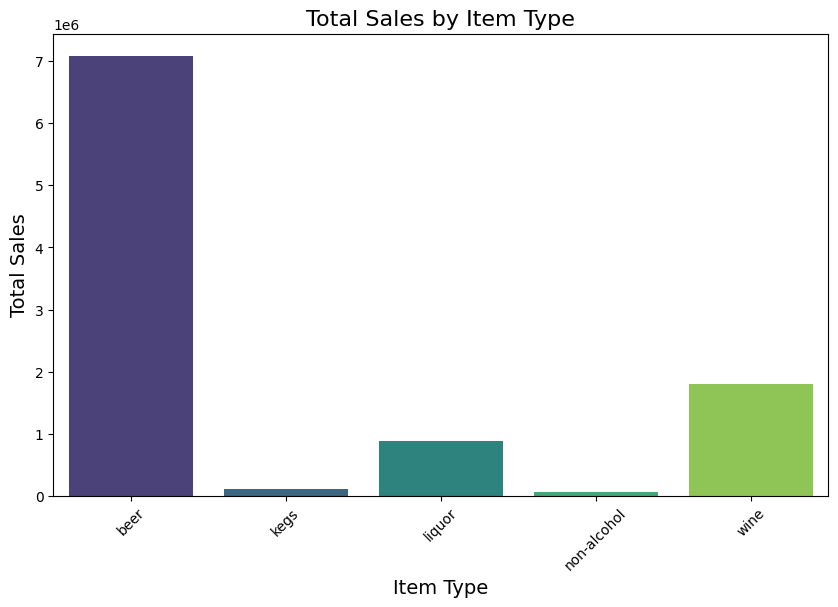

In [51]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_category.index, y=sales_category.values, palette='viridis')

# Add labels and title
plt.title('Total Sales by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45) 

# Display the plot
plt.show()

In [52]:
df.describe()

,year,month,retail_sales,retail_transfers,warehouse_sales,date,returns,refunds,store_supplies,total_sales
count,160370.000000,160370.000000,160370.000000,160370.000000,160370.000000,160370,160370.000000,160370.000000,160370.000000,160370.000000
mean,2018.453196,6.455366,13.205613,13.152975,48.738994,2018-11-27 17:58:54.002618880,0.757324,-0.079186,0.067516,61.944607
min,2017.000000,1.000000,-6.490000,-38.490000,-229.330000,2017-06-01 00:00:00,0.000000,-1755.000000,0.000000,-229.330000
25%,2017.000000,3.000000,0.000000,0.000000,1.000000,2017-11-01 00:00:00,0.000000,0.000000,0.000000,4.470000
50%,2019.000000,7.000000,2.970000,3.000000,5.000000,2019-03-01 00:00:00,0.000000,0.000000,0.000000,9.950000
75%,2019.000000,9.000000,10.820000,11.000000,14.000000,2019-09-01 00:00:00,0.000000,0.000000,0.000000,29.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.010000,2020-09-01 00:00:00,4996.000000,298.000000,428.000000,19491.010000
std,1.088078,3.467819,41.974621,40.902416,340.197933,NaN,49.760253,8.797585,2.493619,362.578662


In [53]:
df.describe(include="object")

,supplier,item_code,item_description,item_type
count,160370,160370,160370,160370
unique,335,18930,19601,8
top,e & j gallo winery,23445,woodford reserve ky strait - 1.75l,wine
freq,9718,24,29,86542
